In [364]:
import re
import pandas as pd
import numpy as np 
from urlextract import URLExtract
import matplotlib.pyplot as plt
import seaborn as sns
import emoji
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
nltk.download("vader_lexicon")                                                  
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
nltk.download("stopwords")


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\pratr\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pratr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [365]:
f = open('grp1.txt','r',encoding='utf-8')

In [366]:
data = f.read()

In [367]:
print(data)

[08/07/22, 11:20:06] Unofficial G-Division : ‎Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them.
[08/07/22, 11:20:06] Kedar Wakade (dy ): ‎Kedar Wakade (dy ) created this group
[08/07/22, 11:25:07] Unofficial G-Division : ‎You joined using this group's invite link
[08/07/22, 11:25:14] Kedar Wakade (dy ): ‎Kedar Wakade (dy ) changed this group's icon
[08/07/22, 11:25:43] Kedar Wakade (dy ): ‎Kedar Wakade (dy ) changed this group's icon
[08/07/22, 11:26:17] Ronak (dy ): ‎Ronak (dy ) joined using this group's invite link
[08/07/22, 11:28:14] Prapti Sinha (dy ): ‎Prapti Sinha (dy ) joined using this group's invite link
[08/07/22, 11:32:05] Sarvesh (dy ): ‎Sarvesh (dy ) joined using this group's invite link
[08/07/22, 11:32:09] Siddhesh Yerunkar (dy ): ‎Siddhesh Yerunkar (dy ) joined using this group's invite link
[08/07/22, 11:32:22] Kshitija Habade (dy ): ‎Kshitija Habade (dy ) joined using this group's invite link
[08/

In [368]:
pattern = r'\[\d{2}/\d{2}/\d{2}, \d{2}:\d{2}:\d{2}\]'

In [369]:
messages = re.split(pattern, data)[1: ]
messages

[' Unofficial G-Division : \u200eMessages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them.\n',
 ' Kedar Wakade (dy ): \u200eKedar Wakade (dy ) created this group\n',
 " Unofficial G-Division : \u200eYou joined using this group's invite link\n",
 " Kedar Wakade (dy ): \u200eKedar Wakade (dy ) changed this group's icon\n",
 " Kedar Wakade (dy ): \u200eKedar Wakade (dy ) changed this group's icon\n",
 " Ronak (dy ): \u200eRonak (dy ) joined using this group's invite link\n",
 " Prapti Sinha (dy ): \u200ePrapti Sinha (dy ) joined using this group's invite link\n",
 " Sarvesh (dy ): \u200eSarvesh (dy ) joined using this group's invite link\n",
 " Siddhesh Yerunkar (dy ): \u200eSiddhesh Yerunkar (dy ) joined using this group's invite link\n",
 " Kshitija Habade (dy ): \u200eKshitija Habade (dy ) joined using this group's invite link\n",
 " Siddharth (dy ): \u200eSiddharth (dy ) joined using this group's invite link\n",
 " Ajinkya

In [370]:
dates = re.findall(pattern, data)
dates

['[08/07/22, 11:20:06]',
 '[08/07/22, 11:20:06]',
 '[08/07/22, 11:25:07]',
 '[08/07/22, 11:25:14]',
 '[08/07/22, 11:25:43]',
 '[08/07/22, 11:26:17]',
 '[08/07/22, 11:28:14]',
 '[08/07/22, 11:32:05]',
 '[08/07/22, 11:32:09]',
 '[08/07/22, 11:32:22]',
 '[08/07/22, 11:35:30]',
 '[08/07/22, 11:36:10]',
 '[08/07/22, 11:37:20]',
 '[08/07/22, 11:43:38]',
 '[08/07/22, 11:43:55]',
 '[08/07/22, 11:44:17]',
 '[08/07/22, 11:47:19]',
 '[08/07/22, 11:47:37]',
 '[08/07/22, 11:52:00]',
 '[08/07/22, 11:52:41]',
 '[08/07/22, 11:55:19]',
 '[08/07/22, 11:58:32]',
 '[08/07/22, 11:59:25]',
 '[08/07/22, 11:59:38]',
 '[08/07/22, 12:01:07]',
 '[08/07/22, 12:01:11]',
 '[08/07/22, 12:02:09]',
 '[08/07/22, 12:09:40]',
 '[08/07/22, 12:11:59]',
 '[08/07/22, 12:12:32]',
 '[08/07/22, 12:15:43]',
 '[08/07/22, 12:15:43]',
 '[08/07/22, 12:20:53]',
 '[08/07/22, 12:28:55]',
 '[08/07/22, 12:59:18]',
 '[08/07/22, 13:05:20]',
 '[08/07/22, 13:08:26]',
 '[08/07/22, 13:16:36]',
 '[08/07/22, 13:34:16]',
 '[08/07/22, 13:49:41]',


In [371]:
def custom_date_parser(date_str):
    date_str = date_str.strip('[]')  # Remove brackets
    return pd.to_datetime(date_str, format='%d/%m/%y, %H:%M:%S')
    
df = pd.DataFrame({'user_message': messages, 'message_date': dates})
df['message_date'] = df['message_date'].apply(custom_date_parser)
df.rename(columns={'message_date': 'date'}, inplace=True)
df.head()

,user_message,date
0,Unofficial G-Division : ‎Messages and calls a...,2022-07-08 11:20:06
1,Kedar Wakade (dy ): ‎Kedar Wakade (dy ) creat...,2022-07-08 11:20:06
2,Unofficial G-Division : ‎You joined using thi...,2022-07-08 11:25:07
3,Kedar Wakade (dy ): ‎Kedar Wakade (dy ) chang...,2022-07-08 11:25:14
4,Kedar Wakade (dy ): ‎Kedar Wakade (dy ) chang...,2022-07-08 11:25:43


In [372]:
df.shape

(3954, 2)

In [373]:
user = []
messages = []
for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]: #user name
        user.append(entry[1])
        messages.append(entry[2])
    else:
        user.append('group_notification')
        messages.append(entry[0])

df['user'] = user
df['message'] = messages
df.drop(columns=['user_message'], inplace=True)
df.head()

,date,user,message
0,2022-07-08 11:20:06,Unofficial G-Division,‎Messages and calls are end-to-end encrypted. ...
1,2022-07-08 11:20:06,Kedar Wakade (dy ),‎Kedar Wakade (dy ) created this group\n
2,2022-07-08 11:25:07,Unofficial G-Division,‎You joined using this group's invite link\n
3,2022-07-08 11:25:14,Kedar Wakade (dy ),‎Kedar Wakade (dy ) changed this group's icon\n
4,2022-07-08 11:25:43,Kedar Wakade (dy ),‎Kedar Wakade (dy ) changed this group's icon\n


In [374]:
df.head()

,date,user,message
0,2022-07-08 11:20:06,Unofficial G-Division,‎Messages and calls are end-to-end encrypted. ...
1,2022-07-08 11:20:06,Kedar Wakade (dy ),‎Kedar Wakade (dy ) created this group\n
2,2022-07-08 11:25:07,Unofficial G-Division,‎You joined using this group's invite link\n
3,2022-07-08 11:25:14,Kedar Wakade (dy ),‎Kedar Wakade (dy ) changed this group's icon\n
4,2022-07-08 11:25:43,Kedar Wakade (dy ),‎Kedar Wakade (dy ) changed this group's icon\n


In [375]:
df.shape

(3954, 3)

In [376]:
df['year'] = df['date'].dt.year

In [377]:
df['month'] = df['date'].dt.month_name()

In [378]:
df['day'] = df['date'].dt.day

In [379]:
df['hour'] = df['date'].dt.hour

In [380]:
df['minute'] = df['date'].dt.minute

In [381]:
df['second'] = df['date'].dt.second

In [382]:
df.head()

,date,user,message,year,month,day,hour,minute,second
0,2022-07-08 11:20:06,Unofficial G-Division,‎Messages and calls are end-to-end encrypted. ...,2022,July,8,11,20,6
1,2022-07-08 11:20:06,Kedar Wakade (dy ),‎Kedar Wakade (dy ) created this group\n,2022,July,8,11,20,6
2,2022-07-08 11:25:07,Unofficial G-Division,‎You joined using this group's invite link\n,2022,July,8,11,25,7
3,2022-07-08 11:25:14,Kedar Wakade (dy ),‎Kedar Wakade (dy ) changed this group's icon\n,2022,July,8,11,25,14
4,2022-07-08 11:25:43,Kedar Wakade (dy ),‎Kedar Wakade (dy ) changed this group's icon\n,2022,July,8,11,25,43


In [383]:
df[df['user'] == 'Prathamesh Tripathi'].shape

(0, 9)

In [384]:
print(df)

                    date                     user  \
0    2022-07-08 11:20:06   Unofficial G-Division    
1    2022-07-08 11:20:06       Kedar Wakade (dy )   
2    2022-07-08 11:25:07   Unofficial G-Division    
3    2022-07-08 11:25:14       Kedar Wakade (dy )   
4    2022-07-08 11:25:43       Kedar Wakade (dy )   
...                  ...                      ...   
3949 2023-10-14 22:14:45          Umam Khan (dy )   
3950 2023-10-14 22:14:53       Vishnu Gupta (dy )   
3951 2023-10-14 22:15:20          Umam Khan (dy )   
3952 2023-10-15 12:22:36              Arnav (dy )   
3953 2023-10-15 12:22:36              Arnav (dy )   

                                                message  year    month  day  \
0     ‎Messages and calls are end-to-end encrypted. ...  2022     July    8   
1              ‎Kedar Wakade (dy ) created this group\n  2022     July    8   
2          ‎You joined using this group's invite link\n  2022     July    8   
3       ‎Kedar Wakade (dy ) changed this group'

In [385]:
df['message']

0       ‎Messages and calls are end-to-end encrypted. ...
1                ‎Kedar Wakade (dy ) created this group\n
2            ‎You joined using this group's invite link\n
3         ‎Kedar Wakade (dy ) changed this group's icon\n
4         ‎Kedar Wakade (dy ) changed this group's icon\n
                              ...                        
3949                                     ‎image omitted\n
3950                                            Saviour\n
3951        But it says IA2 component not full thing 👀\n‎
3952    Technothon-Flyer.pdf • ‎1 page ‎document omitt...
3953                                                     
Name: message, Length: 3954, dtype: object

In [386]:
df.shape[0]

3954

In [387]:
words_print = []
for message in df['message']:
    print(message)

‎Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them.

‎Kedar Wakade (dy ) created this group

‎You joined using this group's invite link

‎Kedar Wakade (dy ) changed this group's icon

‎Kedar Wakade (dy ) changed this group's icon

‎Ronak (dy ) joined using this group's invite link

‎Prapti Sinha (dy ) joined using this group's invite link

‎Sarvesh (dy ) joined using this group's invite link

‎Siddhesh Yerunkar (dy ) joined using this group's invite link

‎Kshitija Habade (dy ) joined using this group's invite link

‎Siddharth (dy ) joined using this group's invite link

‎Ajinkya (dy) joined using this group's invite link

‎Sushant Amrutkar (dy ) joined using this group's invite link

‎~ Sarthak Jadhav joined using this group's invite link

‎Ganesh (dy ) joined using this group's invite link

‎~ Sarthak Jadhav left

‎~ Vighnesh Wadkar joined using this group's invite link

‎Saarim (dy ) joined using this group's invi

In [388]:
words = []
for message in df['message']:
    words.extend(message)

In [389]:
len(words)

130349

In [390]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

In [391]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\pratr\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [392]:
df['message']

0       ‎Messages and calls are end-to-end encrypted. ...
1                ‎Kedar Wakade (dy ) created this group\n
2            ‎You joined using this group's invite link\n
3         ‎Kedar Wakade (dy ) changed this group's icon\n
4         ‎Kedar Wakade (dy ) changed this group's icon\n
                              ...                        
3949                                     ‎image omitted\n
3950                                            Saviour\n
3951        But it says IA2 component not full thing 👀\n‎
3952    Technothon-Flyer.pdf • ‎1 page ‎document omitt...
3953                                                     
Name: message, Length: 3954, dtype: object

In [393]:
sid = SentimentIntensityAnalyzer()

In [394]:
# Assuming your dataset has a column named 'text' containing the text data
sentiment_scores = df['message'].apply(lambda text: sid.polarity_scores(message))

In [395]:
# # Assuming your data is in a CSV file
# df = pd.read_csv('grp1.txt')

In [396]:
# # Function to get sentiment score
# def get_sentiment_score(text):
#     return sid.polarity_scores(text)['compound']

# # Apply sentiment analysis and store the results in a new column
# df['sentiment_score'] = df['text'].apply(get_sentiment_score)


In [397]:
# import matplotlib.pyplot as plt

# # Histogram of sentiment scores
# plt.hist(df['sentiment_score'], bins=20)
# plt.xlabel('Sentiment Score')
# plt.ylabel('Frequency')
# plt.title('Distribution of Sentiment Scores')
# plt.show()


In [398]:
# Merge sentiment scores with original dataframe
df = pd.concat([df, sentiment_scores.apply(pd.Series)], axis=1)

In [399]:
# Display results
print(df)

                    date                     user  \
0    2022-07-08 11:20:06   Unofficial G-Division    
1    2022-07-08 11:20:06       Kedar Wakade (dy )   
2    2022-07-08 11:25:07   Unofficial G-Division    
3    2022-07-08 11:25:14       Kedar Wakade (dy )   
4    2022-07-08 11:25:43       Kedar Wakade (dy )   
...                  ...                      ...   
3949 2023-10-14 22:14:45          Umam Khan (dy )   
3950 2023-10-14 22:14:53       Vishnu Gupta (dy )   
3951 2023-10-14 22:15:20          Umam Khan (dy )   
3952 2023-10-15 12:22:36              Arnav (dy )   
3953 2023-10-15 12:22:36              Arnav (dy )   

                                                message  year    month  day  \
0     ‎Messages and calls are end-to-end encrypted. ...  2022     July    8   
1              ‎Kedar Wakade (dy ) created this group\n  2022     July    8   
2          ‎You joined using this group's invite link\n  2022     July    8   
3       ‎Kedar Wakade (dy ) changed this group'

In [400]:
df[df['message'] == '\u200eimage omitted\n\u200e'].shape[0]

245

In [401]:
extractor = URLExtract()

urls = extractor.find_urls("Let's www.gmail.com have URL stackflow.com as an example google.com, http://facebook.com, ftp://url.in")
urls

['www.gmail.com',
 'stackflow.com',
 'google.com',
 'http://facebook.com',
 'ftp://url.in']

In [402]:
links = []
for message in df['message']:
    links.extend(extractor.find_urls(message))

In [403]:
len(links)


88

In [404]:
links = []
for message in df['message']:
    print(extractor.find_urls(message))

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['https://youtu.be/8qtn0pD2Uck']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['https://drive.google.com/drive/folders/1WKCcc3k9M3TICRat59UPIcNQKawQpZeG?usp=sharing']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['htt

In [405]:
df

,date,user,message,year,month,day,hour,minute,second,neg,neu,pos,compound
0,2022-07-08 11:20:06,Unofficial G-Division,‎Messages and calls are end-to-end encrypted. ...,2022,July,8,11,20,6,0.0,0.0,0.0,0.0
1,2022-07-08 11:20:06,Kedar Wakade (dy ),‎Kedar Wakade (dy ) created this group\n,2022,July,8,11,20,6,0.0,0.0,0.0,0.0
2,2022-07-08 11:25:07,Unofficial G-Division,‎You joined using this group's invite link\n,2022,July,8,11,25,7,0.0,0.0,0.0,0.0
3,2022-07-08 11:25:14,Kedar Wakade (dy ),‎Kedar Wakade (dy ) changed this group's icon\n,2022,July,8,11,25,14,0.0,0.0,0.0,0.0
4,2022-07-08 11:25:43,Kedar Wakade (dy ),‎Kedar Wakade (dy ) changed this group's icon\n,2022,July,8,11,25,43,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3949,2023-10-14 22:14:45,Umam Khan (dy ),‎image omitted\n,2023,October,14,22,14,45,0.0,0.0,0.0,0.0
3950,2023-10-14 22:14:53,Vishnu Gupta (dy ),Saviour\n,2023,October,14,22,14,53,0.0,0.0,0.0,0.0
3951,2023-10-14 22:15:20,Umam Khan (dy ),But it says IA2 component not full thing 👀\n‎,2023,October,14,22,15,20,0.0,0.0,0.0,0.0
3952,2023-10-15 12:22:36,Arnav (dy ),Technothon-Flyer.pdf • ‎1 page ‎document omitt...,2023,October,15,12,22,36,0.0,0.0,0.0,0.0


In [406]:
x = df['user'].value_counts().head()

In [407]:
name = x.index
count = x.values

In [408]:
import matplotlib.pyplot as plt

C:\Users\pratr\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129396 (\N{FACE WITH UNEVEN EYES AND WAVY MOUTH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


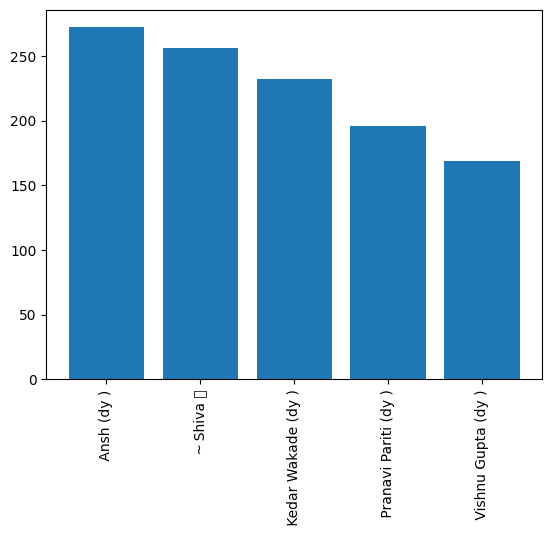

In [409]:
plt.bar(name,count)
plt.xticks(rotation = 'vertical')
plt.show()

In [410]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns = {'index':'name','user':'percent'})
    

,percent,count
0,Ansh (dy ),6.88
1,~ Shiva 🥴,6.47
2,Kedar Wakade (dy ),5.87
3,Pranavi Pariti (dy ),4.96
4,Vishnu Gupta (dy ),4.27
...,...,...
66,~ Sarthak Jadhav,0.05
67,~ Sujal Pokharkar,0.03
68,~ Khush,0.03
69,~ Vighnesh Wadkar,0.03


In [411]:
words = []
for message in df['message']:
    words.extend(message.split())

In [412]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(100000))

,0,1
0,omitted,691
1,‎,655
2,‎image,467
3,Happy,324
4,hai,317
...,...,...
6227,dalegaa,1
6228,🤠🤣,1
6229,Saviour,1
6230,component,1


In [413]:
data = df.dropna()
sentiment = SentimentIntensityAnalyzer()

data["positive"] = [sentiment.polarity_scores(i)["pos"] for i in data["message"]]
data["negative"] = [sentiment.polarity_scores(i)["neg"] for i in data["message"]]
data["neutral"] = [sentiment.polarity_scores(i)["neu"] for i in data["message"]]

data.head(100000)

,date,user,message,year,month,day,hour,minute,second,neg,neu,pos,compound,positive,negative,neutral
0,2022-07-08 11:20:06,Unofficial G-Division,‎Messages and calls are end-to-end encrypted. ...,2022,July,8,11,20,6,0.0,0.0,0.0,0.0,0.000,0.099,0.901
1,2022-07-08 11:20:06,Kedar Wakade (dy ),‎Kedar Wakade (dy ) created this group\n,2022,July,8,11,20,6,0.0,0.0,0.0,0.0,0.286,0.000,0.714
2,2022-07-08 11:25:07,Unofficial G-Division,‎You joined using this group's invite link\n,2022,July,8,11,25,7,0.0,0.0,0.0,0.0,0.211,0.000,0.789
3,2022-07-08 11:25:14,Kedar Wakade (dy ),‎Kedar Wakade (dy ) changed this group's icon\n,2022,July,8,11,25,14,0.0,0.0,0.0,0.0,0.000,0.000,1.000
4,2022-07-08 11:25:43,Kedar Wakade (dy ),‎Kedar Wakade (dy ) changed this group's icon\n,2022,July,8,11,25,43,0.0,0.0,0.0,0.0,0.000,0.000,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3949,2023-10-14 22:14:45,Umam Khan (dy ),‎image omitted\n,2023,October,14,22,14,45,0.0,0.0,0.0,0.0,0.000,0.000,1.000
3950,2023-10-14 22:14:53,Vishnu Gupta (dy ),Saviour\n,2023,October,14,22,14,53,0.0,0.0,0.0,0.0,0.000,0.000,1.000
3951,2023-10-14 22:15:20,Umam Khan (dy ),But it says IA2 component not full thing 👀\n‎,2023,October,14,22,15,20,0.0,0.0,0.0,0.0,0.000,0.000,1.000
3952,2023-10-15 12:22:36,Arnav (dy ),Technothon-Flyer.pdf • ‎1 page ‎document omitt...,2023,October,15,12,22,36,0.0,0.0,0.0,0.0,0.000,0.000,1.000


In [414]:
x = sum(data["positive"])
y = sum(data["negative"])
z = sum(data["neutral"])

def score(a,b,c):
    if(a>b) and (a>c):
        print("postive")
    if(a<b) and (b>c):
        print("negative")
    if(a<c) and (c>b):
        print("neutral")

score (x,y,z)

neutral


In [415]:
stop_words = set(stopwords.words("english"))
def remove_stopwords(message):
    words = message.split()  
    filtered_words = [word for word in words if word.lower() not in stop_words]  
    return ' '.join(filtered_words)  
filtered_data = [remove_stopwords(message) for message in words]
filtered_data

['\u200eMessages',
 '',
 'calls',
 '',
 'end-to-end',
 'encrypted.',
 '',
 'one',
 'outside',
 '',
 '',
 'chat,',
 '',
 'even',
 'WhatsApp,',
 '',
 'read',
 '',
 'listen',
 '',
 'them.',
 '\u200eKedar',
 'Wakade',
 '(dy',
 ')',
 'created',
 '',
 'group',
 '\u200eYou',
 'joined',
 'using',
 '',
 "group's",
 'invite',
 'link',
 '\u200eKedar',
 'Wakade',
 '(dy',
 ')',
 'changed',
 '',
 "group's",
 'icon',
 '\u200eKedar',
 'Wakade',
 '(dy',
 ')',
 'changed',
 '',
 "group's",
 'icon',
 '\u200eRonak',
 '(dy',
 ')',
 'joined',
 'using',
 '',
 "group's",
 'invite',
 'link',
 '\u200ePrapti',
 'Sinha',
 '(dy',
 ')',
 'joined',
 'using',
 '',
 "group's",
 'invite',
 'link',
 '\u200eSarvesh',
 '(dy',
 ')',
 'joined',
 'using',
 '',
 "group's",
 'invite',
 'link',
 '\u200eSiddhesh',
 'Yerunkar',
 '(dy',
 ')',
 'joined',
 'using',
 '',
 "group's",
 'invite',
 'link',
 '\u200eKshitija',
 'Habade',
 '(dy',
 ')',
 'joined',
 'using',
 '',
 "group's",
 'invite',
 'link',
 '\u200eSiddharth',
 '(dy',
 ')'

In [416]:

df = pd.DataFrame({'stop_words': filtered_data}, index=range(len(filtered_data)))


In [417]:
df.shape

(21892, 1)

In [418]:
df.head(1000000)

,stop_words
0,‎Messages
1,
2,calls
3,
4,end-to-end
...,...
21887,•
21888,‎1
21889,page
21890,‎document


In [419]:
df['stop_words']

0         ‎Messages
1                  
2             calls
3                  
4        end-to-end
            ...    
21887             •
21888            ‎1
21889          page
21890     ‎document
21891       omitted
Name: stop_words, Length: 21892, dtype: object

In [420]:
stop_words = []
for filtered_data in df['stop_words']:
    words.extend(message.split())

In [421]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(100000))

,0,1
0,omitted,691
1,‎,655
2,‎image,467
3,Happy,324
4,hai,317
...,...,...
6227,dalegaa,1
6228,🤠🤣,1
6229,Saviour,1
6230,component,1


In [422]:
data = df.dropna()
sentiment = SentimentIntensityAnalyzer()

data["positive"] = [sentiment.polarity_scores(i)["pos"] for i in data["stop_words"]]
data["negative"] = [sentiment.polarity_scores(i)["neg"] for i in data["stop_words"]]
data["neutral"] = [sentiment.polarity_scores(i)["neu"] for i in data["stop_words"]]

data.head(1000000)

,stop_words,positive,negative,neutral
0,‎Messages,0.0,0.0,1.0
1,,0.0,0.0,0.0
2,calls,0.0,0.0,1.0
3,,0.0,0.0,0.0
4,end-to-end,0.0,0.0,1.0
...,...,...,...,...
21887,•,0.0,0.0,0.0
21888,‎1,0.0,0.0,1.0
21889,page,0.0,0.0,1.0
21890,‎document,0.0,0.0,1.0


In [423]:
x = sum(data["positive"])
y = sum(data["negative"])
z = sum(data["neutral"])

def score(a,b,c):
    if(a>b) and (a>c):
        print("postive")
    if(a<b) and (b>c):
        print("negative")
    if(a<c) and (c>b):
        print("neutral")

score (x,y,z)

neutral
